- Melakukan instalasi docker
-ile laporan penginstallan dan setup: https://github.com/oktayudha05/Kuliah/blob/master/Big%20Data/praktikum/pertemuan1/oktario%20mufti%20yudha_2320506044_proses%20instalasi%20tugas%201.pdf
- Mulai mengerjakan tugas

- **Tugas 1**: Buat modifikasi dengan menambahkan data lain berupa kolom pekerjaan, hobi dan gender.

In [22]:
# Tugas 1
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Programmer", "Mancing", "Pria"), ("Bambang", 23, "Nganggur", "Cari Kerja", "Pria"), ("Citra", 29, "Admin", "Sepak Bola", "Wanita"), ("Dina", 45, "Polisi", "Archery", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-------+----+----------+----------+------+
|   Nama|Usia| Pekerjaan|      Hobi|Gender|
+-------+----+----------+----------+------+
|    Ali|  34|Programmer|   Mancing|  Pria|
|Bambang|  23|  Nganggur|Cari Kerja|  Pria|
|  Citra|  29|     Admin|Sepak Bola|Wanita|
|   Dina|  45|    Polisi|   Archery|Wanita|
+-------+----+----------+----------+------+



- **Tugas 2**: Lakukan filter, penghitungan rata-rata, dan pengurutan data menggunakan PySpark.

In [2]:
# Tugas 2
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=True)
df_sorted.show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Budi|  23|
|Citra|  29|
|  Ali|  34|
| Dina|  45|
+-----+----+



- **Tugas 3**: Modifikasi DataFrame Pandas dengan menambahkan kolom baru dan melakukan operasi seperti filtering data berdasarkan usia.

In [16]:
# Tugas 3
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina", "Rio"], "Usia": [34, 23, 29, 45, 18], "Pekerjaan": ["Programmer", "Nganggur", "Admin", "Polisi", "Pelajar"]}
df_pandas = pd.DataFrame(data_pandas)

# Filtering data berdasarkan usia
df_filtered = df_pandas[df_pandas["Usia"] < 30]

# Menampilkan DataFrame Pandas yang sudah difilter
df_filtered

,Nama,Usia,Pekerjaan
1,Budi,23,Nganggur
2,Citra,29,Admin
4,Rio,18,Pelajar


- **Tugas 4**: Lakukan penggabungan DataFrame dan visualisasikan data dengan Pandas.

    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


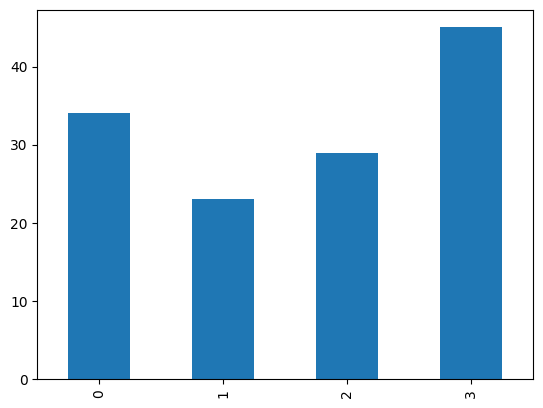

In [17]:
# Tugas 4
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

- **Tugas 5**: Menggabungkan data yang Anda buat di PySpark dengan data dari Pandas, kemudian lakukan analisis sederhana seperti menghitung rata-rata usia.

In [19]:
# Tugas 5
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df_spark_from_pandas.groupBy().agg(avg("Usia")).show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+



- **Tugas 6**: Gabungkan data dari PySpark dan Pandas, lalu lakukan operasi statistik seperti menghitung nilai maksimum usia.

In [21]:
# Tugas 6
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# GABUNG data dari pyspark dan pandas, dan operasi statistik menghitung nilai maksimum usia
df_combined = df_spark_from_pandas.union(df)
df_combined.agg({"Usia": "max"}).show()


+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|max(Usia)|
+---------+
|       45|
+---------+

